In [10]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import csv

In [11]:

#__________________________________________
#kmeans
def getHighlight(leye):
    leftEye = leye.reshape((-1, 3))

    leftEye1 = leftEye.astype('float32')
    stop = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    k = 3
    _, l, (centers) = cv2.kmeans(leftEye1, k, None, stop, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = centers.astype('uint8')

    l = l.flatten()
    K_seg = centers[l]
    K_seg = K_seg.reshape(leye.shape)


    leftEye2 = leftEye
    leftEye2[l == 0] = [0,0,0]
    leftEye2[l == 1] = [0,0,0] 
    #leftEye2[l == 2] = [0,0,0] # eye
    leftEye2 = leftEye2.reshape(leye.shape)



    leftEye3 = leftEye2.reshape((-1, 3))

    leftEye3 = leftEye3.astype('float32')
    stop1 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    k = 3
    _, l1, (centers1) = cv2.kmeans(leftEye3, k, None, stop1, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers1 = centers1.astype('uint8')

    l1 = l1.flatten()
    K_seg1 = centers1[l1]
    K_seg1 = K_seg1.reshape(leye.shape)

    leftEye4 = leftEye2
    leftEye4[l1 == 0] = [0,0,0]
    leftEye4[l1 == 1] = [0,0,0] 
    #leftEye4[l1 == 2] = [0,0,0] # eye
    leftEye4 = leftEye4.reshape(leye.shape)


    return K_seg1
    """ plt.imshow(leftEye2)
    plt.show() """

In [12]:

def detectCIrcle(img):
#img = cv2.imread('eyes.jpg', cv2.IMREAD_COLOR)

    #img= cv2.imread("../data/inputs/style.png")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Blur using 3 * 3 kernel.
    gray_blurred = cv2.blur(gray, (3, 3))
    
    # Apply Hough transform on the blurred image.
    detected_circles = cv2.HoughCircles(gray_blurred,
                    cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
                param2 = 30, minRadius = 1, maxRadius = 30)

    # Draw circles that are detected.
    if detected_circles is not None:

        # Convert the circle parameters a, b and r to integers.
        detected_circles = np.uint16(np.around(detected_circles))
        
        min=1000
        pos=[0.0,0.0,0.0]
        w,h=np.shape(gray)
        for pt in detected_circles[0, :]:
            a, b, r = pt[0], pt[1], pt[2]

            dis=(a-h//2)^2+(b-w//2)^2
            if(dis<min):
                min=dis
                pos=[a,b,r]

            a, b, r = pos[0], pos[1], pos[2]
            circleEye=np.zeros_like(img)
            for i in range(w):
                for j in range(h):
                    if((((i-b)**2+(j-a)**2))<0.8*r**2):
                        circleEye[i][j]=img[i][j]
            
            cropEye=circleEye[b-r:b+r,a-r:a+r]
                
            return cropEye,r
#------------------------------
#detect refctangle
#detectCIrcle()
#img= cv2.imread("../data/inputs/p1.png")
#detectCIrcle(img)

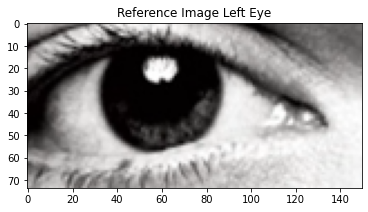

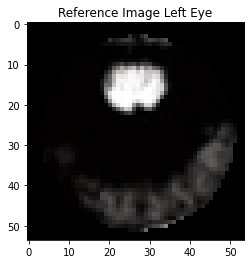

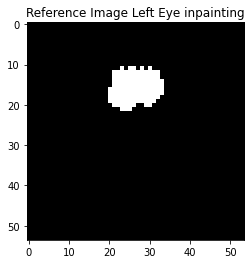

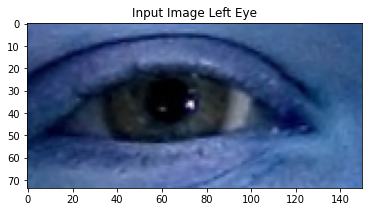

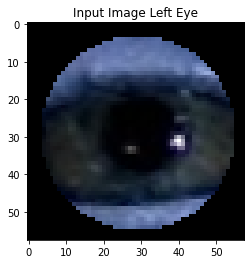

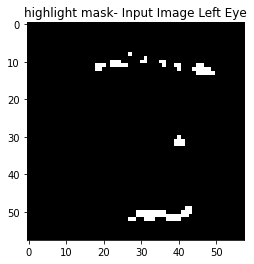

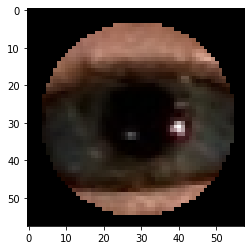

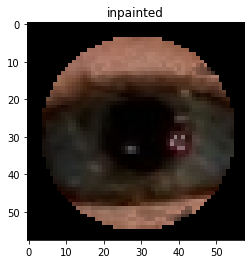

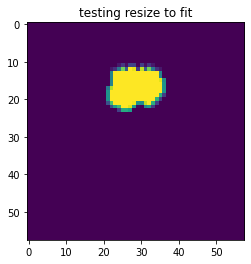

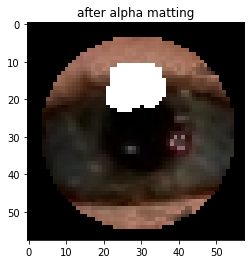

In [13]:

#refim
ref = cv2.imread("../data/inputs/style2.png")
fileref = open('../data/inputs/style2.lm')

type(fileref)
csvreader = csv.reader(fileref)

model1 = np.zeros((66,2))
rows = []
i = 0
for row in csvreader:
    model1[i] = row
    i = i + 1

model1 = np.array(model1).astype(float)

leye_center = np.mean(model1[37:42,: ],axis = 0)
leye_center = np.round(leye_center).astype(int)
reye_center = np.round(np.mean(model1[43:48,:],axis = 0)).astype(int)

half_width = 75
half_height = 37

leyeRef = ref[leye_center[1] - half_height : leye_center[1] + half_height, leye_center[0] - half_width  : leye_center[0] + half_width,:]

reye = ref[reye_center[1] - half_height : reye_center[1] + half_height, reye_center[0] - half_width  : reye_center[0] + half_width,:]
#higImg=getHighlight(leye)
plt.imshow(leyeRef)
plt.title("Reference Image Left Eye")
plt.show()

cirImg,rRef=detectCIrcle(leyeRef)

plt.imshow(cirImg)
plt.title("Reference Image Left Eye")
plt.show()

leye_raw_lab = cv2.cvtColor(cirImg, cv2.COLOR_BGR2Lab)
inpainting_mask1 = leye_raw_lab[:,:,0]>150

plt.imshow(inpainting_mask1,cmap='gray')
plt.title("Reference Image Left Eye inpainting")
plt.show()

#inputimage

im = cv2.imread("../data/inputs/p2.png")
file = open('../data/inputs/p2.lm')


type(file)
csvreader = csv.reader(file)

model = np.zeros((66,2))
rows = []
i = 0
for row in csvreader:
    model[i] = row
    i = i + 1

model = np.array(model).astype(float)


leye_center = np.mean(model[37:42,: ],axis = 0)
leye_center = np.round(leye_center).astype(int)
reye_center = np.round(np.mean(model[43:48,:],axis = 0)).astype(int)


half_width = 75
half_height = 37



leye = im[leye_center[1] - half_height : leye_center[1] + half_height, leye_center[0] - half_width  : leye_center[0] + half_width,:]

reye = im[reye_center[1] - half_height : reye_center[1] + half_height, reye_center[0] - half_width  : reye_center[0] + half_width,:]
#higImg=getHighlight(leye)
plt.imshow(leye)
plt.title("Input Image Left Eye")
plt.show()

cirImg,rInp=detectCIrcle(leye)
plt.imshow(cirImg)
plt.title("Input Image Left Eye")
plt.show()
##inpainting 

leye_raw_lab = cv2.cvtColor(cirImg, cv2.COLOR_BGR2Lab)
inpainting_mask = leye_raw_lab[:,:,0]>150

plt.imshow(inpainting_mask,cmap='gray')
plt.title("highlight mask- Input Image Left Eye")
plt.show()
leye_raw_inpainted = cv2.inpaint(cirImg,inpainting_mask.astype('uint8')*255,5,cv2.INPAINT_TELEA)
plt.imshow(cirImg[:,:,::-1])

plt.show()

plt.imshow(leye_raw_inpainted[:,:,::-1])
plt.title('inpainted')
plt.show()



##resize

##copy ref to input
#leye_raw_inpainted[:,:,::-1]-inpainted input
#inpainting_mask1 -ref image highlights

inputEye=leye_raw_inpainted[:,:,::-1]
higlightEye=inpainting_mask1.astype('uint8')*255

a1,b1=np.shape(higlightEye)
a2,b2,c2=np.shape(inputEye)
ratio=rRef*a2/rInp
test=cv2.resize(higlightEye, (b2, a2),interpolation = cv2.INTER_LINEAR)
leyeRef=cv2.resize(leyeRef, (b2, a2),interpolation = cv2.INTER_LINEAR)
plt.imshow(test)
plt.title('testing resize to fit')
plt.show()
# plt.imshow(inputEye)
# plt.show()
# print(np.shape(inputEye),np.shape(test))
#ref to inp
##resize


##align center 

##alpha

alpha_map = np.repeat(test[:, :, np.newaxis], 3, axis=2)*255
inputEye[test>0]=255
# tout = inputEye + alpha_map#*leyeRef
# tout = (1-alpha_map)*inputEye + (alpha_map)*leyeRef


plt.imshow(inputEye)
plt.title("after alpha matting")
plt.show()